In [1]:
library("factoextra")
options(repr.plot.width=12, repr.plot.height=13)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [2]:
path="C:/Users/Jordi/New_Jupyter/Jupyter"
setwd(path)
mydata = read.csv("data-all.csv", sep=";")

In [3]:
mydata = mydata[mydata$comp_opt != 'NF',]
mydata = mydata[mydata$comp_opt != 'O1',]
mydata = mydata[mydata$comp_opt != 'O0',]
#mydata = mydata[mydata$label != '2D4PStencil_E',]
#mydata = mydata[mydata$label != 'Reduction_E',]
#mydata = mydata[mydata$label != '2PStencil_E',]

head(mydata)
unique(mydata[,"comp_opt"])

id,size_vector,comp_opt,label,PAPI_L1_DCM,PAPI_L2_TCM,PAPI_L3_TCM,PAPI_L2_TCA,PAPI_L3_TCA,PAPI_TOT_INS,...,PAPI_LST_INS,PAPI_TOT_CYC,PAPI_FP_OPS,PAPI_L2_TCW,PAPI_L3_TCR,PAPI_L2_TCR,PAPI_L2_ICR,PAPI_L3_ICR,PAPI_L3_ICA,PAPI_L2_ICA
1,30000000,O2,Copy_E,7506186,7263082,7258293,11989361,7263082,154342988,...,60622683,685044637,85,1300880,1970892,2053622,15324,3467,3467,15324
2,30000000,O2,Copy_E,7504612,7262535,7259435,12006689,7262535,155831189,...,60906735,679896951,46,1289810,1975892,2054583,14184,2585,2585,14184
3,30000000,O2,Copy_E,7504513,7259672,7256657,12029882,7259672,155976579,...,60824770,680176203,48,1288318,1975799,2054540,14539,2838,2838,14539
4,30000000,O2,Copy_E,7504531,7259552,7256565,12019150,7259552,155903369,...,60760474,680002746,47,1290408,1975062,2053632,14388,2691,2691,14388
5,30000000,O2,Copy_E,7504455,7260257,7257406,12012086,7260257,155785956,...,60752082,680638685,45,1293332,1977685,2056448,14303,2565,2565,14303
6,30000000,O2,Copy_E,7504655,7262011,7258802,12022105,7262011,155948636,...,60790603,681637009,45,1297857,1976265,2054810,14201,2629,2629,14201


[1] O2
Levels: O0 O1 O2

In [4]:
colnames(mydata)

[1] "id"           "size_vector"  "comp_opt"     "label"        "PAPI_L1_DCM" 
 [6] "PAPI_L2_TCM"  "PAPI_L3_TCM"  "PAPI_L2_TCA"  "PAPI_L3_TCA"  "PAPI_TOT_INS"
[11] "PAPI_REF_CYC" "PAPI_L2_TCH"  "PAPI_L1_TCM"  "PAPI_L2_ICH"  "PAPI_L1_ICA" 
[16] "PAPI_L1_ICR"  "PAPI_L1_ICH"  "PAPI_L2_DCA"  "PAPI_L3_LDM"  "PAPI_DP_OPS" 
[21] "PAPI_FP_INS"  "PAPI_VEC_SP"  "PAPI_VEC_DP"  "PAPI_SP_OPS"  "PAPI_L1_ICM" 
[26] "PAPI_L2_DCM"  "PAPI_L2_ICM"  "PAPI_L2_LDM"  "PAPI_L2_STM"  "PAPI_L3_DCA" 
[31] "PAPI_L3_DCR"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_NTK" 
[36] "PAPI_BR_INS"  "PAPI_TLB_DM"  "PAPI_TLB_IM"  "PAPI_TLB_TL"  "PAPI_L1_LDM" 
[41] "PAPI_L1_STM"  "PAPI_L2_DCR"  "PAPI_L2_DCW"  "PAPI_BR_MSP"  "PAPI_BR_PRC" 
[46] "PAPI_L3_TCW"  "PAPI_L3_DCW"  "PAPI_TOT_IIS" "PAPI_LD_INS"  "PAPI_SR_INS" 
[51] "PAPI_RES_STL" "PAPI_LST_INS" "PAPI_TOT_CYC" "PAPI_FP_OPS"  "PAPI_L2_TCW" 
[56] "PAPI_L3_TCR"  "PAPI_L2_TCR"  "PAPI_L2_ICR"  "PAPI_L3_ICR"  "PAPI_L3_ICA" 
[61] "PAPI_L2_ICA"

In [5]:
head(mydata)

id,size_vector,comp_opt,label,PAPI_L1_DCM,PAPI_L2_TCM,PAPI_L3_TCM,PAPI_L2_TCA,PAPI_L3_TCA,PAPI_TOT_INS,...,PAPI_LST_INS,PAPI_TOT_CYC,PAPI_FP_OPS,PAPI_L2_TCW,PAPI_L3_TCR,PAPI_L2_TCR,PAPI_L2_ICR,PAPI_L3_ICR,PAPI_L3_ICA,PAPI_L2_ICA
1,30000000,O2,Copy_E,7506186,7263082,7258293,11989361,7263082,154342988,...,60622683,685044637,85,1300880,1970892,2053622,15324,3467,3467,15324
2,30000000,O2,Copy_E,7504612,7262535,7259435,12006689,7262535,155831189,...,60906735,679896951,46,1289810,1975892,2054583,14184,2585,2585,14184
3,30000000,O2,Copy_E,7504513,7259672,7256657,12029882,7259672,155976579,...,60824770,680176203,48,1288318,1975799,2054540,14539,2838,2838,14539
4,30000000,O2,Copy_E,7504531,7259552,7256565,12019150,7259552,155903369,...,60760474,680002746,47,1290408,1975062,2053632,14388,2691,2691,14388
5,30000000,O2,Copy_E,7504455,7260257,7257406,12012086,7260257,155785956,...,60752082,680638685,45,1293332,1977685,2056448,14303,2565,2565,14303
6,30000000,O2,Copy_E,7504655,7262011,7258802,12022105,7262011,155948636,...,60790603,681637009,45,1297857,1976265,2054810,14201,2629,2629,14201


In [6]:
dfu <- unique(mydata$size_vector)
#dfu[order(dfu)]

comprss <- function(tx) { 
      div <- findInterval(as.numeric(gsub("\\,", "", tx)), 
                          c(1, 1e3, 1e6, 1e9, 1e12) )
      paste(round( as.numeric(gsub("\\,","",tx))/10^(3*(div-1)), 2), 
           c("","K","M","B","T")[div] )}
comprss(dfu[order(dfu)])



[1] "1 K"   "2 K"   "3 K"   "4 K"   "5 K"   "6 K"   "7 K"   "8 K"   "9 K"  
[10] "10 K"  "20 K"  "30 K"  "40 K"  "50 K"  "60 K"  "70 K"  "80 K"  "90 K" 
[19] "100 K" "200 K" "300 K" "400 K" "500 K" "600 K" "700 K" "800 K" "900 K"
[28] "1 M"   "2 M"   "3 M"   "4 M"   "5 M"   "6 M"   "7 M"   "8 M"   "9 M"  
[37] "10 M"  "20 M"  "30 M"  "40 M"  "50 M"  "60 M"  "70 M"  "80 M"  "90 M" 
[46] "100 M" "110 M" "120 M" "130 M" "140 M" "150 M" "160 M" "170 M" "180 M"
[55] "190 M" "200 M"

In [7]:
#print(new_mydata[,c("PAPI_VEC_SP","PAPI_VEC_DP")])
#print(mydata[,c("PAPI_VEC_SP","PAPI_SP_OPS")])

In [8]:
#div = mydata$PAPI_SP_OPS/mydata$PAPI_VEC_SP
#div <- na.omit(div)
#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN + mydata$PAPI_BR_UCN)

In [9]:
#mean(div)
#quantile(div,0.25)
#quantile(div,0.5)
#quantile(div,0.75)
#boxplot(div)

In [10]:
#print(mydata[,c("PAPI_BR_INS","PAPI_BR_CN","PAPI_BR_UCN")])#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN/mydata$PAPI_BR_UCN)
#print(subs)
#perc = subs/mydata$PAPI_BR_INS

#head(percent(perc[order(perc,decreasing = TRUE)]))

In [11]:
#all(new_mydata$PAPI_VEC_SP == new_mydata$PAPI_VEC_DP)
all(mydata$PAPI_DP_SP == mydata$PAPI_SP_OPS)

[1] TRUE

In [12]:
new_mydata = mydata[,5:61]
new_mydata <- subset(new_mydata, select = -c(PAPI_TOT_CYC))
new_mydata <- subset(new_mydata, select = -c(PAPI_TLB_DM))
new_mydata <- subset(new_mydata, select = -c(PAPI_FP_INS))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_TCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_TCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_DCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_DCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_TCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_DCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCM))
new_mydata <- subset(new_mydata, select = -c(PAPI_BR_INS))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICH))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICM))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICH))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICM))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_ICA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_ICR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_TCM))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCH))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCM))
new_mydata <- subset(new_mydata, select = -c(PAPI_TLB_IM))
new_mydata <- subset(new_mydata, select = -c(PAPI_RES_STL))
new_mydata <- subset(new_mydata, select = -c(PAPI_BR_PRC))
new_mydata <- subset(new_mydata, select = -c(PAPI_BR_NTK))
new_mydata <- subset(new_mydata, select = -c(PAPI_VEC_DP))
new_mydata <- subset(new_mydata, select = -c(PAPI_SP_OPS))
new_mydata <- subset(new_mydata, select = -c(PAPI_VEC_SP))

dim(new_mydata)
colnames(new_mydata)

[1] 392000     20

[1] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L3_LDM" 
 [6] "PAPI_DP_OPS"  "PAPI_L2_LDM"  "PAPI_L2_STM"  "PAPI_BR_UCN"  "PAPI_BR_CN"  
[11] "PAPI_BR_TKN"  "PAPI_TLB_TL"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_BR_MSP" 
[16] "PAPI_TOT_IIS" "PAPI_LD_INS"  "PAPI_SR_INS"  "PAPI_LST_INS" "PAPI_FP_OPS"

In [13]:
new_mydata

,PAPI_L1_DCM,PAPI_L3_TCM,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_L3_LDM,PAPI_DP_OPS,PAPI_L2_LDM,PAPI_L2_STM,PAPI_BR_UCN,PAPI_BR_CN,PAPI_BR_TKN,PAPI_TLB_TL,PAPI_L1_LDM,PAPI_L1_STM,PAPI_BR_MSP,PAPI_TOT_IIS,PAPI_LD_INS,PAPI_SR_INS,PAPI_LST_INS,PAPI_FP_OPS
1,7506186,7258293,154342988,683762580,1856203,11,1964552,1125291,8644,31733394,31203359,1792,2038703,1292758,27391,4683349,30591982,30030701,60622683,85
2,7504612,7259435,155831189,682068942,1862053,9,1969070,1125671,8252,32107420,31378706,974,2043569,1293122,25275,5972772,30877430,30029305,60906735,46
3,7504513,7256657,155976579,681824898,1863960,9,1968178,1122179,8257,32267769,31470783,905,2041555,1290591,26036,5669758,30795465,30029305,60824770,48
4,7504531,7256565,155903369,682132230,1863593,9,1966623,1119083,8248,31956457,31303460,833,2036938,1290931,25458,5266196,30731169,30029305,60760474,47
5,7504455,7257406,155785956,681756498,1859930,9,1973219,1124586,8257,31994035,31317097,888,2040495,1287850,24768,5130673,30722777,30029305,60752082,45
6,7504655,7258802,155948636,682244226,1863038,9,1972006,1122832,8276,32053620,31351186,860,2034221,1286393,25996,5424187,30761299,30029304,60790603,45
7,7504539,7256951,155755592,682272108,1862616,9,1973934,1123441,8226,32209078,31424135,889,2041049,1283914,26971,5147042,30715908,30029305,60745213,49
8,7504488,7257842,155684642,682204050,1868679,9,1968174,1117749,8272,32258196,31461518,859,2036990,1288429,25436,5165885,30746731,30029298,60776029,45
9,7504479,7257409,155608254,681584364,1865506,9,1970488,1120864,8256,32038289,31343203,909,2044447,1287607,25594,5603825,30789195,30029305,60818500,45
10,7504597,7259772,155721236,681531570,1867672,9,1968924,1119182,8291,32476914,31559599,850,2039344,1290225,25494,5984076,30848331,30029304,60877635,47


In [14]:
log.ir <-scale(new_mydata, center = TRUE, scale = TRUE)
res.label <- mydata[,4]
res.pca <- prcomp(log.ir, center = TRUE, scale. = TRUE)



In [15]:
print(res.pca)

Standard deviations (1, .., p=20):
 [1] 4.067357e+00 1.225069e+00 8.288949e-01 6.318607e-01 5.596263e-01
 [6] 4.922808e-01 3.917116e-01 2.947152e-01 1.911040e-01 1.436523e-01
[11] 8.858599e-02 8.055554e-02 3.804600e-02 2.288432e-02 1.081723e-02
[16] 9.265834e-03 3.014484e-03 1.771190e-03 1.857281e-04 1.275086e-14

Rotation (n x k) = (20 x 20):
                   PC1         PC2         PC3         PC4         PC5
PAPI_L1_DCM  0.2441432 -0.01775248  0.04788922  0.07887715 -0.12451131
PAPI_L3_TCM  0.2289890  0.25785002  0.03793697  0.14636629  0.03565422
PAPI_TOT_INS 0.2420694 -0.07271367 -0.03060378 -0.04455323  0.20241089
PAPI_REF_CYC 0.2396309  0.15896618  0.02230286  0.07468160  0.11136842
PAPI_L3_LDM  0.1552917  0.56984419  0.09174550  0.28979946 -0.43647660
PAPI_DP_OPS  0.2141475 -0.39575588  0.02216188 -0.07250838 -0.05430332
PAPI_L2_LDM  0.2302891 -0.11307397  0.09375062  0.13352658 -0.36656892
PAPI_L2_STM  0.2335633  0.01897961  0.08460708  0.12222068  0.28674604
PAPI_BR_UCN  0.

In [16]:
names(res.pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [17]:
print(res.pca$sdev)

 [1] 4.067357e+00 1.225069e+00 8.288949e-01 6.318607e-01 5.596263e-01
 [6] 4.922808e-01 3.917116e-01 2.947152e-01 1.911040e-01 1.436523e-01
[11] 8.858599e-02 8.055554e-02 3.804600e-02 2.288432e-02 1.081723e-02
[16] 9.265834e-03 3.014484e-03 1.771190e-03 1.857281e-04 1.275086e-14


In [18]:
head(unclass(res.pca$rotation)[])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
PAPI_L1_DCM,0.2441432,-0.01775248,0.04788922,0.07887715,-0.12451131,0.007241362,-0.011179957,0.112531510,0.03432655,-0.3714471,0.123629604,-0.19809102,-0.23886529,0.0374665605,0.29245418,-0.66162737,0.317251434,0.1647889218,-3.744963e-04,2.524457e-14
PAPI_L3_TCM,0.2289890,0.25785002,0.03793697,0.14636629,0.03565422,-0.002334379,0.254028423,-0.323779483,0.23402736,0.1488244,0.338909678,-0.20944014,0.17480743,0.3995837876,0.44809159,0.24674289,0.003255348,0.0052101406,1.289120e-03,-9.652129e-15
PAPI_TOT_INS,0.2420694,-0.07271367,-0.03060378,-0.04455323,0.20241089,0.145560124,-0.001075528,0.152501337,-0.14931919,0.1123929,-0.027681036,0.08091565,0.26631175,-0.0502456895,-0.08777413,0.27109058,0.713981839,0.3756575851,2.485800e-03,4.667561e-15
PAPI_REF_CYC,0.2396309,0.15896618,0.02230286,0.07468160,0.11136842,-0.002653661,-0.075362207,-0.019106513,0.34413302,-0.0657473,-0.003931679,0.13950385,0.13411164,0.4854544453,-0.66177152,-0.24171236,-0.022034151,-0.0067417250,-1.100767e-03,-5.133732e-15
PAPI_L3_LDM,0.1552917,0.56984419,0.09174550,0.28979946,-0.43647660,-0.022532789,-0.117417611,0.313127842,-0.10749268,0.3636259,-0.316716162,-0.06915395,0.03225588,-0.0665074368,0.02425123,-0.03127952,0.002157221,0.0009513444,-5.940623e-05,-2.463093e-15
PAPI_DP_OPS,0.2141475,-0.39575588,0.02216188,-0.07250838,-0.05430332,-0.001894531,0.010255253,0.006811522,0.13322810,0.2808670,-0.237067270,-0.10783081,0.25962128,0.0005658693,0.10620933,-0.17991781,-0.104627444,-0.0545939399,7.065546e-01,1.288051e-15


In [19]:
# Eigenvalues
eig <- (res.pca$sdev)^2
print(eig)

 [1] 1.654339e+01 1.500795e+00 6.870667e-01 3.992479e-01 3.131816e-01
 [6] 2.423404e-01 1.534380e-01 8.685706e-02 3.652072e-02 2.063597e-02
[11] 7.847478e-03 6.489194e-03 1.447498e-03 5.236920e-04 1.170125e-04
[16] 8.585568e-05 9.087111e-06 3.137113e-06 3.449491e-08 1.625844e-28


In [20]:
# Variances in percentage
variance <- eig*100/sum(eig)
print(variance)

 [1] 8.271697e+01 7.503975e+00 3.435333e+00 1.996240e+00 1.565908e+00
 [6] 1.211702e+00 7.671899e-01 4.342853e-01 1.826036e-01 1.031799e-01
[11] 3.923739e-02 3.244597e-02 7.237491e-03 2.618460e-03 5.850624e-04
[16] 4.292784e-04 4.543556e-05 1.568556e-05 1.724746e-07 8.129219e-28


In [21]:
# Cumulative variances
cumvar <- cumsum(variance)
print(cumvar)

 [1]  82.71697  90.22094  93.65628  95.65252  97.21842  98.43013  99.19732
 [8]  99.63160  99.81421  99.91739  99.95662  99.98907  99.99631  99.99892
[15]  99.99951  99.99994  99.99998 100.00000 100.00000 100.00000


In [22]:
eig.decathlon2.active <- data.frame(eig = eig, variance = variance,cumvariance = cumvar)
print(eig.decathlon2.active)

            eig     variance cumvariance
1  1.654339e+01 8.271697e+01    82.71697
2  1.500795e+00 7.503975e+00    90.22094
3  6.870667e-01 3.435333e+00    93.65628
4  3.992479e-01 1.996240e+00    95.65252
5  3.131816e-01 1.565908e+00    97.21842
6  2.423404e-01 1.211702e+00    98.43013
7  1.534380e-01 7.671899e-01    99.19732
8  8.685706e-02 4.342853e-01    99.63160
9  3.652072e-02 1.826036e-01    99.81421
10 2.063597e-02 1.031799e-01    99.91739
11 7.847478e-03 3.923739e-02    99.95662
12 6.489194e-03 3.244597e-02    99.98907
13 1.447498e-03 7.237491e-03    99.99631
14 5.236920e-04 2.618460e-03    99.99892
15 1.170125e-04 5.850624e-04    99.99951
16 8.585568e-05 4.292784e-04    99.99994
17 9.087111e-06 4.543556e-05    99.99998
18 3.137113e-06 1.568556e-05   100.00000
19 3.449491e-08 1.724746e-07   100.00000
20 1.625844e-28 8.129219e-28   100.00000


In [23]:
summary(res.pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     4.0674 1.22507 0.82889 0.63186 0.55963 0.49228 0.39171
Proportion of Variance 0.8272 0.07504 0.03435 0.01996 0.01566 0.01212 0.00767
Cumulative Proportion  0.8272 0.90221 0.93656 0.95653 0.97218 0.98430 0.99197
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.29472 0.19110 0.14365 0.08859 0.08056 0.03805 0.02288
Proportion of Variance 0.00434 0.00183 0.00103 0.00039 0.00032 0.00007 0.00003
Cumulative Proportion  0.99632 0.99814 0.99917 0.99957 0.99989 0.99996 0.99999
                          PC15     PC16     PC17     PC18      PC19      PC20
Standard deviation     0.01082 0.009266 0.003014 0.001771 0.0001857 1.275e-14
Proportion of Variance 0.00001 0.000000 0.000000 0.000000 0.0000000 0.000e+00
Cumulative Proportion  1.00000 1.000000 1.000000 1.000000 1.0000000 1.000e+00

In [24]:
library("factoextra")
eig.val <- get_eigenvalue(res.pca)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,16.5433937,82.716969,82.71697
Dim.2,1.5007950,7.503975,90.22094
Dim.3,0.6870667,3.435333,93.65628
Dim.4,0.3992479,1.996240,95.65252
Dim.5,0.3131816,1.565908,97.21842
Dim.6,0.2423404,1.211702,98.43013


In [25]:
options(repr.plot.width = 20, repr.plot.height = 10)

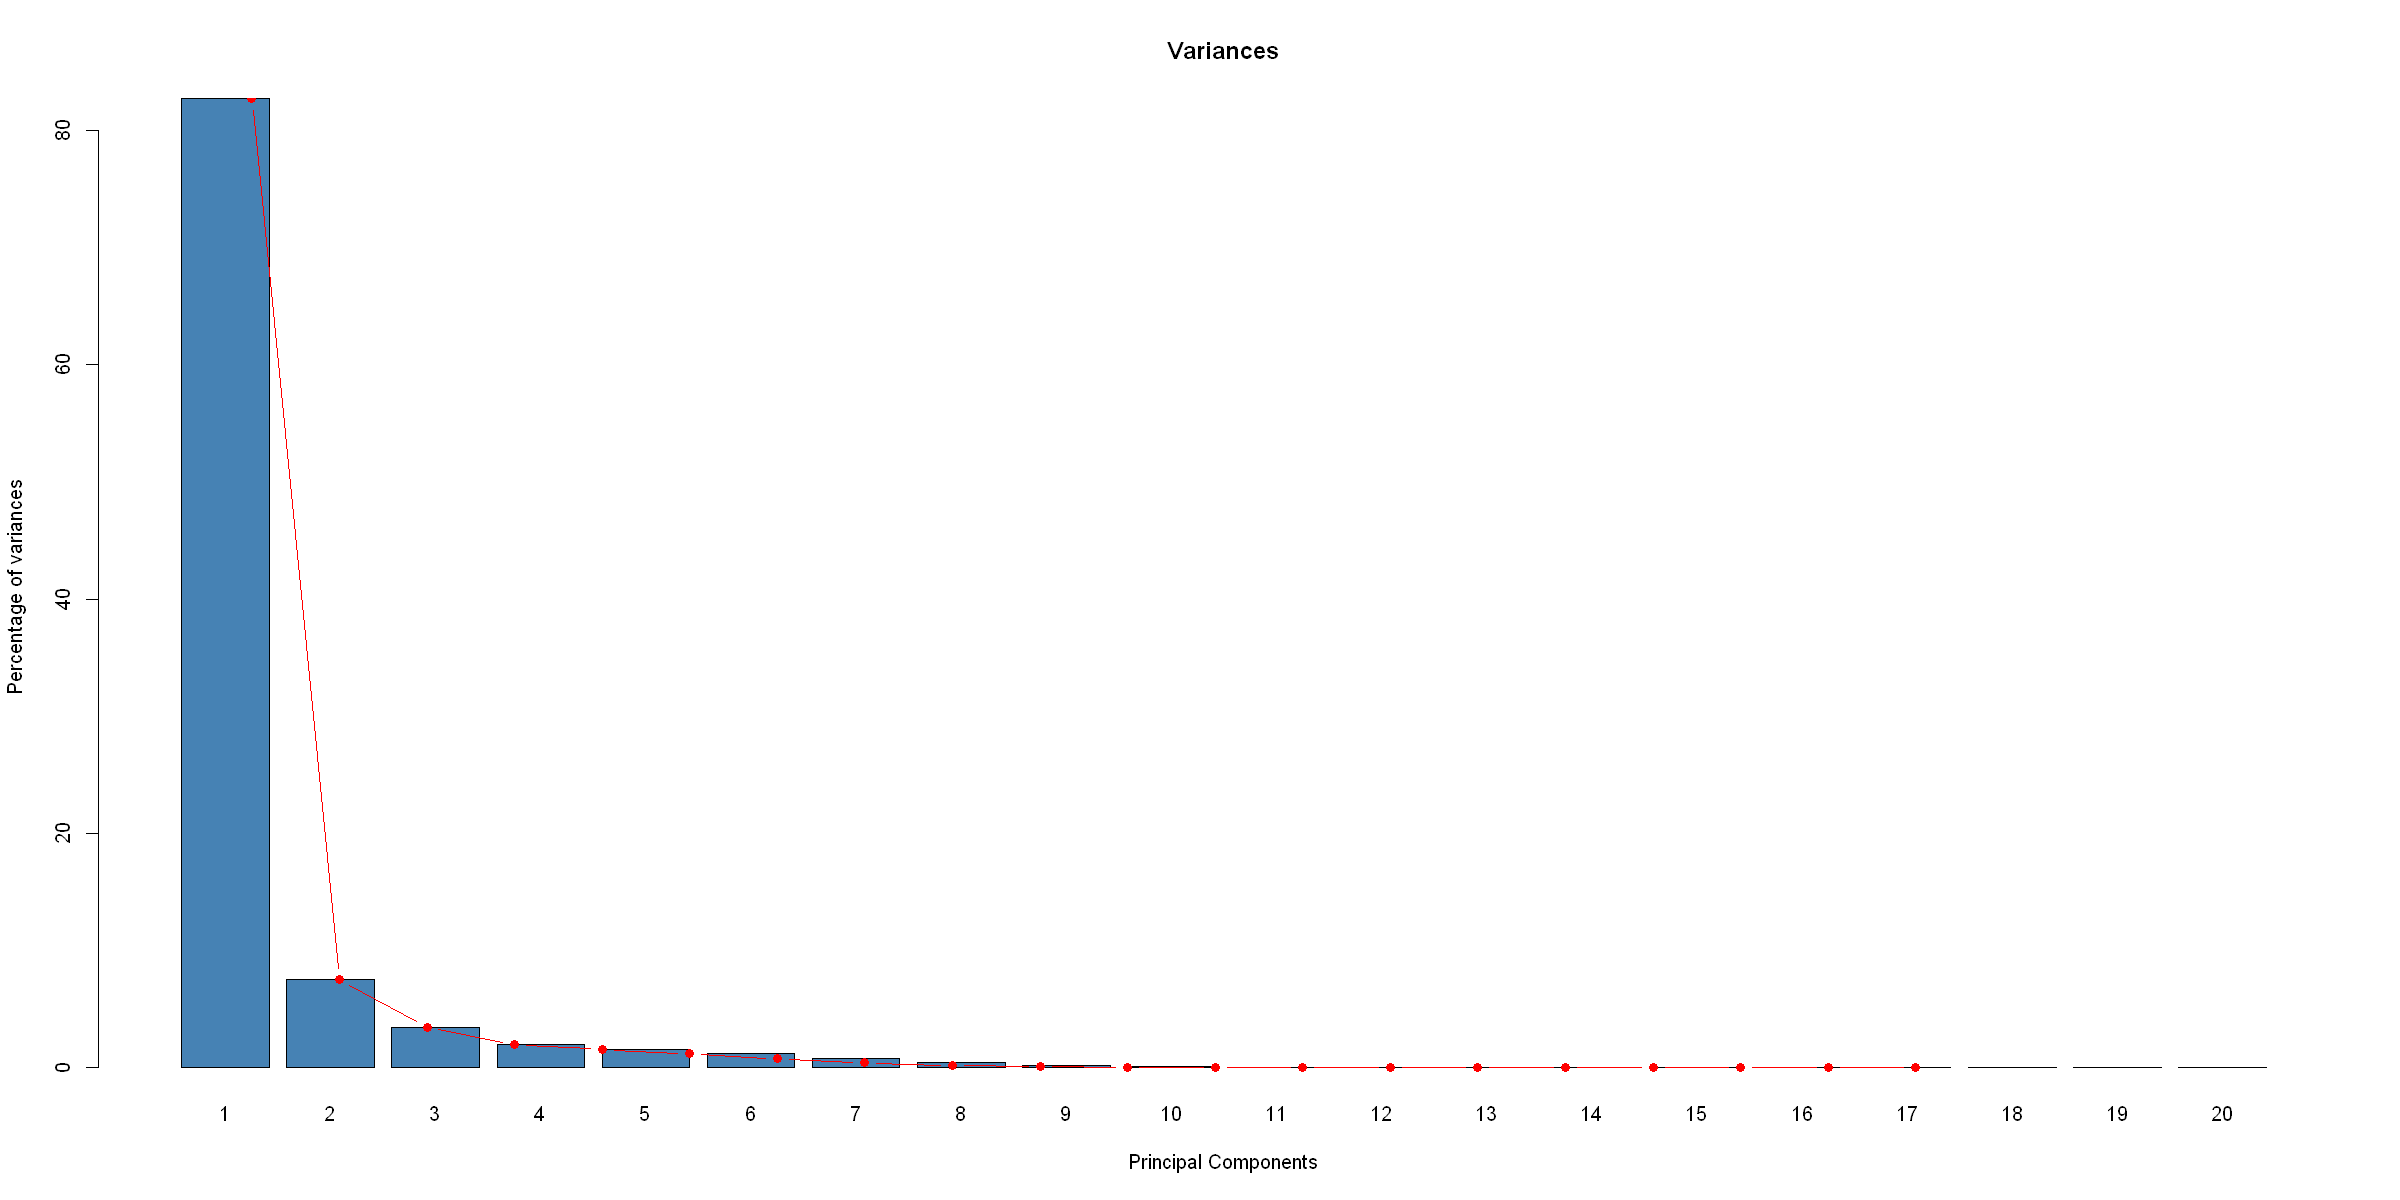

In [26]:
barplot(eig.decathlon2.active[, 2], names.arg=1:nrow(eig.decathlon2.active), 
       main = "Variances",
       xlab = "Principal Components",
       ylab = "Percentage of variances",
       col ="steelblue")
# Add connected line segments to the plot
lines(x = 1:nrow(eig.decathlon2.active), 
      eig.decathlon2.active[, 2], 
      type="b", pch=19, col = "red")

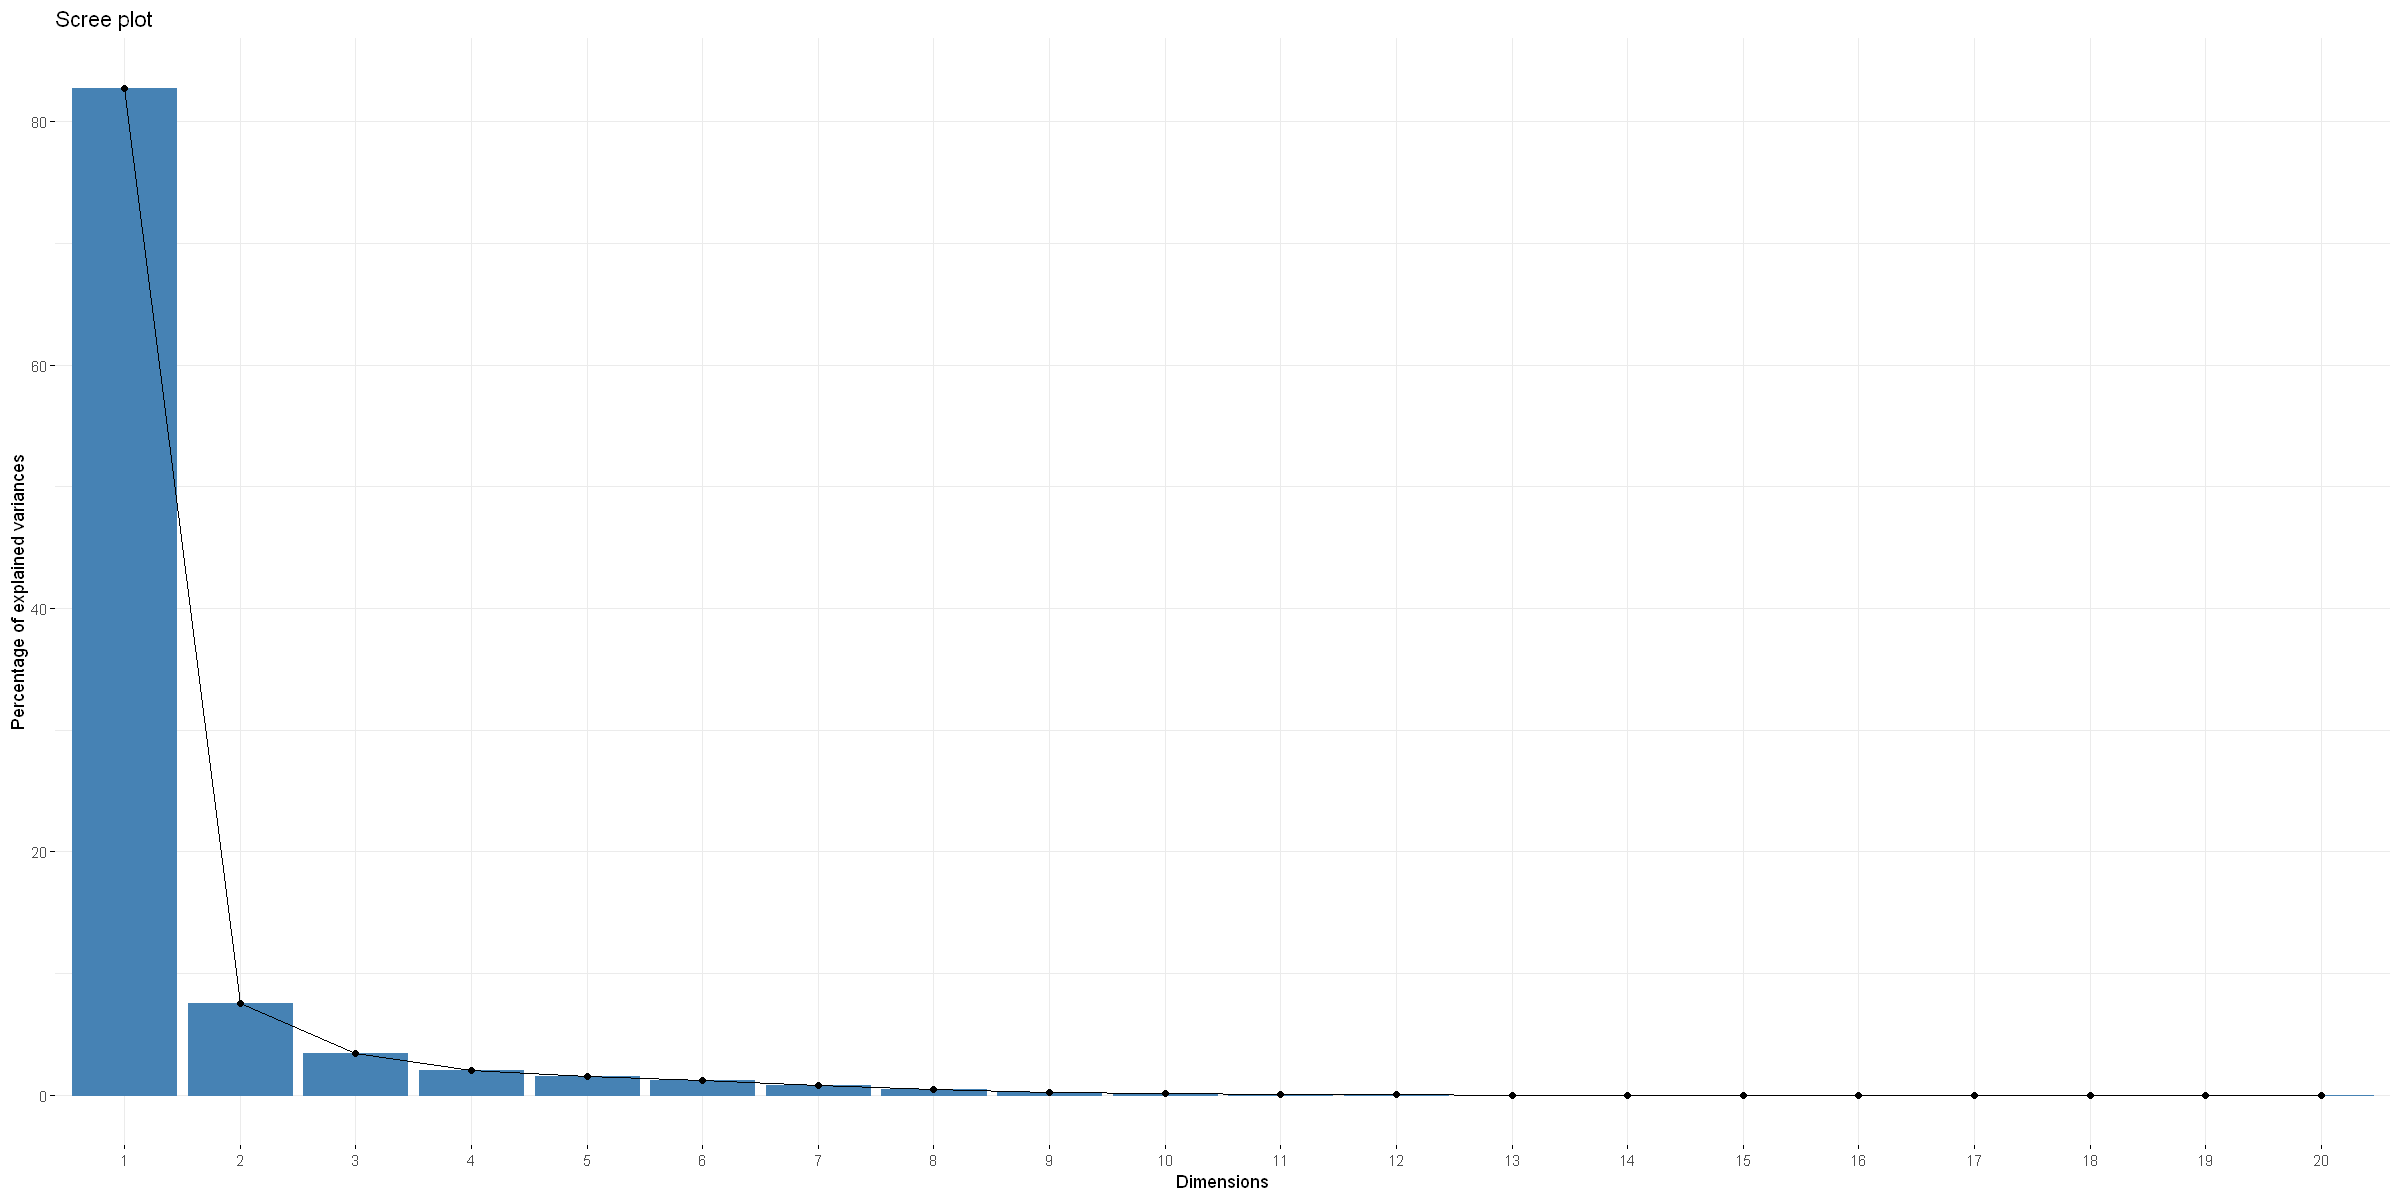

In [27]:
fviz_screeplot(res.pca, ncp=54)

In [28]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [29]:
var$coord


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14,Dim.15,Dim.16,Dim.17,Dim.18,Dim.19,Dim.20
PAPI_L1_DCM,0.9930174,-0.02174802,0.03969513,0.04983937,-0.069679800,0.0035647837,-0.0043793190,0.033164749,0.006559939,-0.0533592097,0.0109518509,-0.0159573280,-0.0090878692,8.573967e-04,3.163544e-03,-6.130529e-03,9.563492e-04,2.918724e-04,-6.955446e-08,3.218900e-28
PAPI_L3_TCM,0.9313802,0.31588417,0.03144576,0.09248310,0.019953036,-0.0011491697,0.0995058802,-0.095422743,0.044723556,0.0213789583,0.0300226495,-0.0168715628,0.0066507237,9.144202e-03,4.847110e-03,2.286279e-03,9.813194e-06,9.228147e-06,2.394257e-07,-1.230729e-28
PAPI_TOT_INS,0.9845828,-0.08907929,-0.02536732,-0.02815143,0.113274453,0.0716564548,-0.0004212967,0.044944466,-0.028535489,0.0161454913,-0.0024521520,0.0065182032,0.0101320974,-1.149838e-03,-9.494730e-04,2.511880e-03,2.152287e-03,6.653608e-04,4.616827e-07,5.951541e-29
PAPI_REF_CYC,0.9746643,0.19474461,0.01848673,0.04718836,0.062324696,-0.0013063463,-0.0295202505,-0.005630980,0.065765183,-0.0094447483,-0.0003482917,0.0112378074,0.0051024118,1.110929e-02,-7.158535e-03,-2.239667e-03,-6.642159e-05,-1.194087e-05,-2.044434e-07,-6.545949e-29
PAPI_L3_LDM,0.6316268,0.69809867,0.07604737,0.18311288,-0.244263780,-0.0110924597,-0.0459938401,0.092283543,-0.020542277,0.0522356793,-0.0280566150,-0.0055707333,0.0012272073,-1.521977e-03,2.623312e-04,-2.898309e-04,6.502906e-06,1.685011e-06,-1.103340e-08,-3.140655e-29
PAPI_DP_OPS,0.8710143,-0.48482842,0.01836987,-0.04581519,-0.030389568,-0.0009326413,0.0040171015,0.002007459,0.025460418,0.0403471821,-0.0210008389,-0.0086863688,0.0098775518,1.294953e-05,1.148891e-03,-1.667089e-03,-3.153977e-04,-9.669622e-05,1.312270e-04,1.642375e-29
PAPI_L2_LDM,0.9366679,-0.13852346,0.07770941,0.08437019,-0.205141603,-0.0065023590,0.1788077519,-0.099213093,-0.056269249,-0.0340329974,-0.0208386415,0.0400676048,0.0003207780,1.511548e-03,-1.594130e-04,3.082159e-04,-2.253088e-06,-8.616466e-09,2.648513e-08,-1.594683e-29
PAPI_L2_STM,0.9499851,0.02325134,0.07013037,0.07722644,0.160470624,-0.1709557261,0.1571890955,-0.050039891,-0.040852218,0.0313159741,0.0017693867,-0.0331976486,-0.0104526875,-6.213841e-03,-3.649558e-03,-5.703676e-04,-1.461883e-05,-3.548553e-06,-1.031792e-07,9.092435e-29
PAPI_BR_UCN,0.6111652,0.09655586,-0.76219717,-0.10886501,-0.084596760,-0.1283888494,0.0257290755,0.007210667,0.001154779,-0.0014313239,0.0002510003,0.0004406920,0.0000724156,1.003539e-04,-4.995146e-06,-8.742533e-06,1.402146e-06,-1.440695e-06,-3.031151e-10,-2.341049e-30
PAPI_BR_CN,0.9399700,0.14173435,-0.10050399,-0.05549209,0.116124331,0.2624395891,0.0151326544,-0.005046474,-0.020757267,-0.0001016768,-0.0100976460,-0.0019824917,-0.0057503965,-6.631423e-04,3.505515e-04,-2.097879e-04,-1.461113e-03,9.639037e-04,9.133680e-08,1.738225e-28


Loading required package: plyr
Loading required package: scales
Loading required package: grid


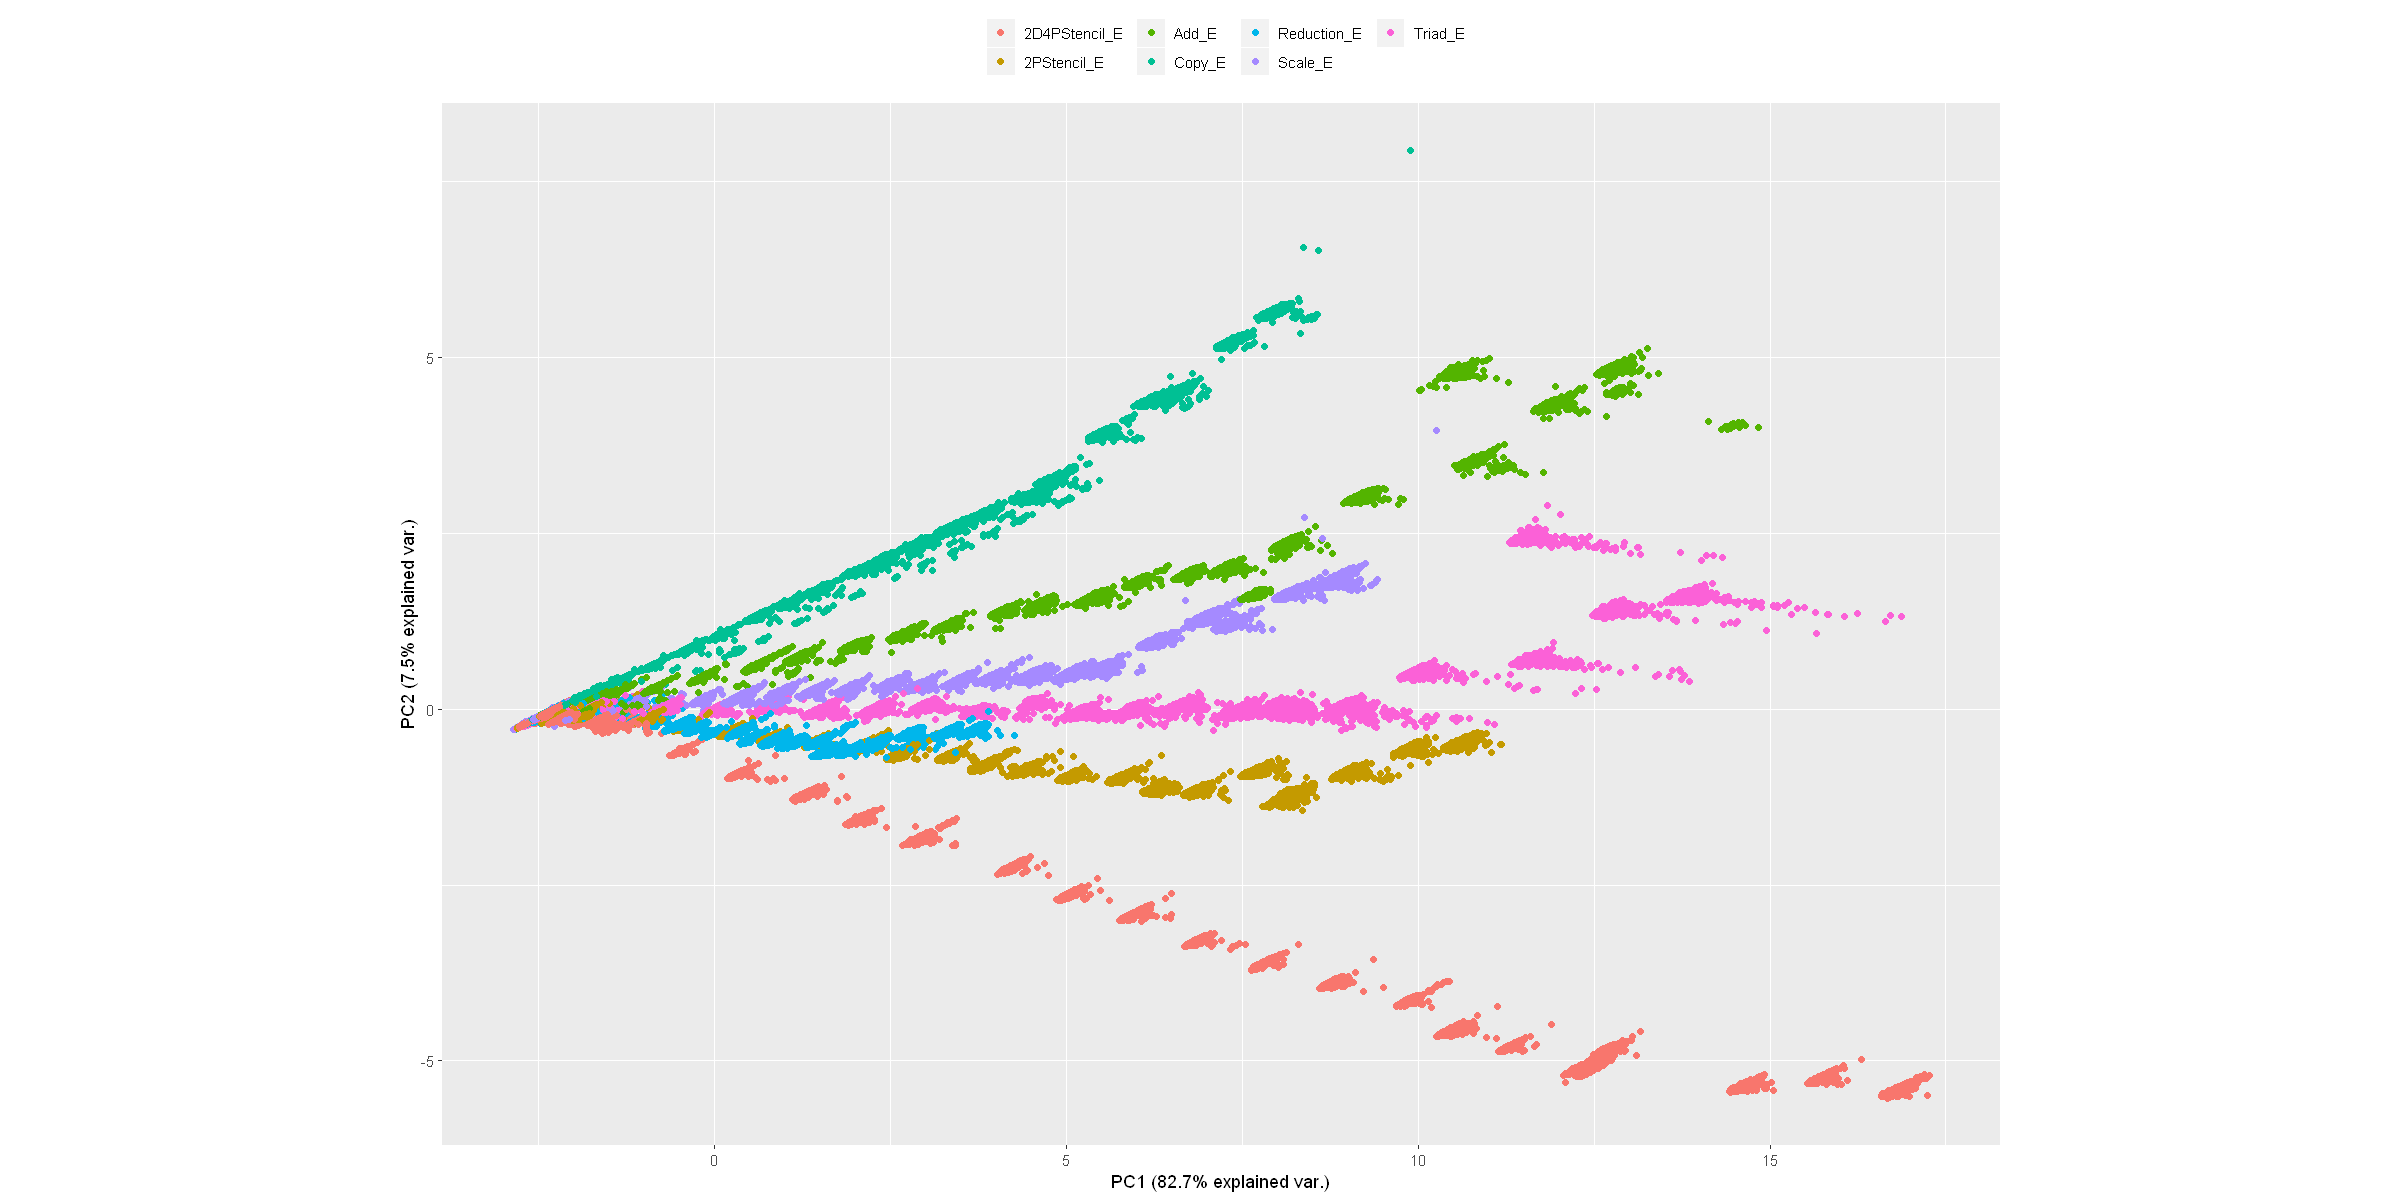

In [30]:
library(devtools)
library(ggbiplot)
g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = res.label, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', legend.position = 'top')
print(g)

In [31]:
# Helper function : 
# Correlation between variables and principal components
var_cor_func <- function(var.loadings, comp.sdev){
  var.loadings*comp.sdev
  }

# Variable correlation/coordinates
loadings <- res.pca$rotation
sdev <- res.pca$sdev

var.coord <- var.cor <- t(apply(loadings, 1, var_cor_func, sdev))
print(var.coord[, 1:4])

                   PC1         PC2         PC3         PC4
PAPI_L1_DCM  0.9930174 -0.02174802  0.03969513  0.04983937
PAPI_L3_TCM  0.9313802  0.31588417  0.03144576  0.09248310
PAPI_TOT_INS 0.9845828 -0.08907929 -0.02536732 -0.02815143
PAPI_REF_CYC 0.9746643  0.19474461  0.01848673  0.04718836
PAPI_L3_LDM  0.6316268  0.69809867  0.07604737  0.18311288
PAPI_DP_OPS  0.8710143 -0.48482842  0.01836987 -0.04581519
PAPI_L2_LDM  0.9366679 -0.13852346  0.07770941  0.08437019
PAPI_L2_STM  0.9499851  0.02325134  0.07013037  0.07722644
PAPI_BR_UCN  0.6111652  0.09655586 -0.76219717 -0.10886501
PAPI_BR_CN   0.9399700  0.14173435 -0.10050399 -0.05549209
PAPI_BR_TKN  0.9395454  0.14297391 -0.09962012 -0.05561377
PAPI_TLB_TL  0.7204106  0.32566076  0.23687813 -0.55300769
PAPI_L1_LDM  0.9333717 -0.27292459  0.03859604  0.01791364
PAPI_L1_STM  0.9603926 -0.06390573  0.05173388  0.02121740
PAPI_BR_MSP  0.9798783  0.14140508  0.01973070  0.04622949
PAPI_TOT_IIS 0.9407473 -0.02944768 -0.01204778  0.051802

In [32]:
var.cos2 <- var.coord^2
print(var.cos2)

                   PC1          PC2          PC3          PC4          PC5
PAPI_L1_DCM  0.9860836 0.0004729765 0.0015757032 2.483963e-03 4.855275e-03
PAPI_L3_TCM  0.8674690 0.0997828075 0.0009888359 8.553125e-03 3.981236e-04
PAPI_TOT_INS 0.9694032 0.0079351199 0.0006435009 7.925032e-04 1.283110e-02
PAPI_REF_CYC 0.9499704 0.0379254613 0.0003417591 2.226742e-03 3.884368e-03
PAPI_L3_LDM  0.3989525 0.4873417575 0.0057832026 3.353033e-02 5.966479e-02
PAPI_DP_OPS  0.7586659 0.2350585957 0.0003374522 2.099032e-03 9.235258e-04
PAPI_L2_LDM  0.8773467 0.0191887501 0.0060387517 7.118330e-03 4.208308e-02
PAPI_L2_STM  0.9024718 0.0005406248 0.0049182688 5.963923e-03 2.575082e-02
PAPI_BR_UCN  0.3735229 0.0093230338 0.5809445218 1.185159e-02 7.156612e-03
PAPI_BR_CN   0.8835436 0.0200886254 0.0101010518 3.079372e-03 1.348486e-02
PAPI_BR_TKN  0.8827456 0.0204415399 0.0099241676 3.092891e-03 1.357505e-02
PAPI_TLB_TL  0.5189915 0.1060549315 0.0561112504 3.058175e-01 6.206729e-03
PAPI_L1_LDM  0.8711827 0.

In [33]:
comp.cos2 <- apply(var.cos2, 2, sum)

contrib <- function(var.cos2, comp.cos2){var.cos2*100/comp.cos2}

var.contrib <- t(apply(var.cos2,1, contrib, comp.cos2))
print(var.contrib)

                  PC1         PC2         PC3         PC4         PC5
PAPI_L1_DCM  5.960588  0.03151506  0.22933774  0.62216051  1.55030657
PAPI_L3_TCM  5.243598  6.64866336  0.14392139  2.14230920  0.12712231
PAPI_TOT_INS 5.859760  0.52872777  0.09365916  0.19849902  4.09701671
PAPI_REF_CYC 5.742295  2.52702476  0.04974177  0.55773408  1.24029252
PAPI_L3_LDM  2.411551 32.47224015  0.84172362  8.39837261 19.05118254
PAPI_DP_OPS  4.585915 15.66227201  0.04911491  0.52574649  0.29488511
PAPI_L2_LDM  5.303306  1.27857236  0.87891783  1.78293478 13.43727740
PAPI_L2_STM  5.455179  0.03602256  0.71583572  1.49378951  8.22232942
PAPI_BR_UCN  2.257837  0.62120635 84.55431330  2.96847901  2.28513181
PAPI_BR_CN   5.340764  1.33853227  1.47017050  0.77129317  4.30576416
PAPI_BR_TKN  5.335940  1.36204744  1.44442567  0.77467936  4.33456062
PAPI_TLB_TL  3.137153  7.06658346  8.16678369 76.59839845  1.98183081
PAPI_L1_LDM  5.266046  4.96322511  0.21681369  0.08037574 13.55972881
PAPI_L1_STM  5.57536

In [34]:
print(sort(var.contrib[,'PC1'],decreasing=TRUE))

 PAPI_L1_DCM PAPI_TOT_INS PAPI_LST_INS  PAPI_BR_MSP PAPI_REF_CYC  PAPI_L1_STM 
    5.960588     5.859760     5.854604     5.803897     5.742295     5.575361 
 PAPI_LD_INS  PAPI_SR_INS  PAPI_L2_STM PAPI_TOT_IIS   PAPI_BR_CN  PAPI_BR_TKN 
    5.474052     5.456522     5.455179     5.349600     5.340764     5.335940 
 PAPI_L2_LDM  PAPI_L1_LDM  PAPI_L3_TCM  PAPI_FP_OPS  PAPI_DP_OPS  PAPI_TLB_TL 
    5.303306     5.266046     5.243598     4.586031     4.585915     3.137153 
 PAPI_L3_LDM  PAPI_BR_UCN 
    2.411551     2.257837 


In [35]:
print(sort(var.contrib[,'PC2'],decreasing=TRUE))

 PAPI_L3_LDM  PAPI_DP_OPS  PAPI_FP_OPS  PAPI_TLB_TL  PAPI_L3_TCM  PAPI_L1_LDM 
 32.47224015  15.66227201  15.66107170   7.06658346   6.64866336   4.96322511 
 PAPI_LD_INS PAPI_REF_CYC  PAPI_SR_INS  PAPI_BR_TKN   PAPI_BR_CN  PAPI_BR_MSP 
  4.75716025   2.52702476   2.13018006   1.36204744   1.33853227   1.33232023 
 PAPI_L2_LDM PAPI_LST_INS  PAPI_BR_UCN PAPI_TOT_INS  PAPI_L1_STM PAPI_TOT_IIS 
  1.27857236   1.25273606   0.62120635   0.52872777   0.27211861   0.05778042 
 PAPI_L2_STM  PAPI_L1_DCM 
  0.03602256   0.03151506 


In [36]:
print(sort(var.contrib[,'PC3'],decreasing=TRUE))

 PAPI_BR_UCN  PAPI_TLB_TL   PAPI_BR_CN  PAPI_BR_TKN  PAPI_L2_LDM  PAPI_L3_LDM 
 84.55431330   8.16678369   1.47017050   1.44442567   0.87891783   0.84172362 
 PAPI_L2_STM  PAPI_L1_STM  PAPI_SR_INS  PAPI_L1_DCM  PAPI_L1_LDM PAPI_LST_INS 
  0.71583572   0.38953930   0.28986107   0.22933774   0.21681369   0.19531087 
 PAPI_L3_TCM  PAPI_LD_INS PAPI_TOT_INS  PAPI_BR_MSP PAPI_REF_CYC  PAPI_DP_OPS 
  0.14392139   0.14363966   0.09365916   0.05666123   0.04974177   0.04911491 
 PAPI_FP_OPS PAPI_TOT_IIS 
  0.04910297   0.02112591 


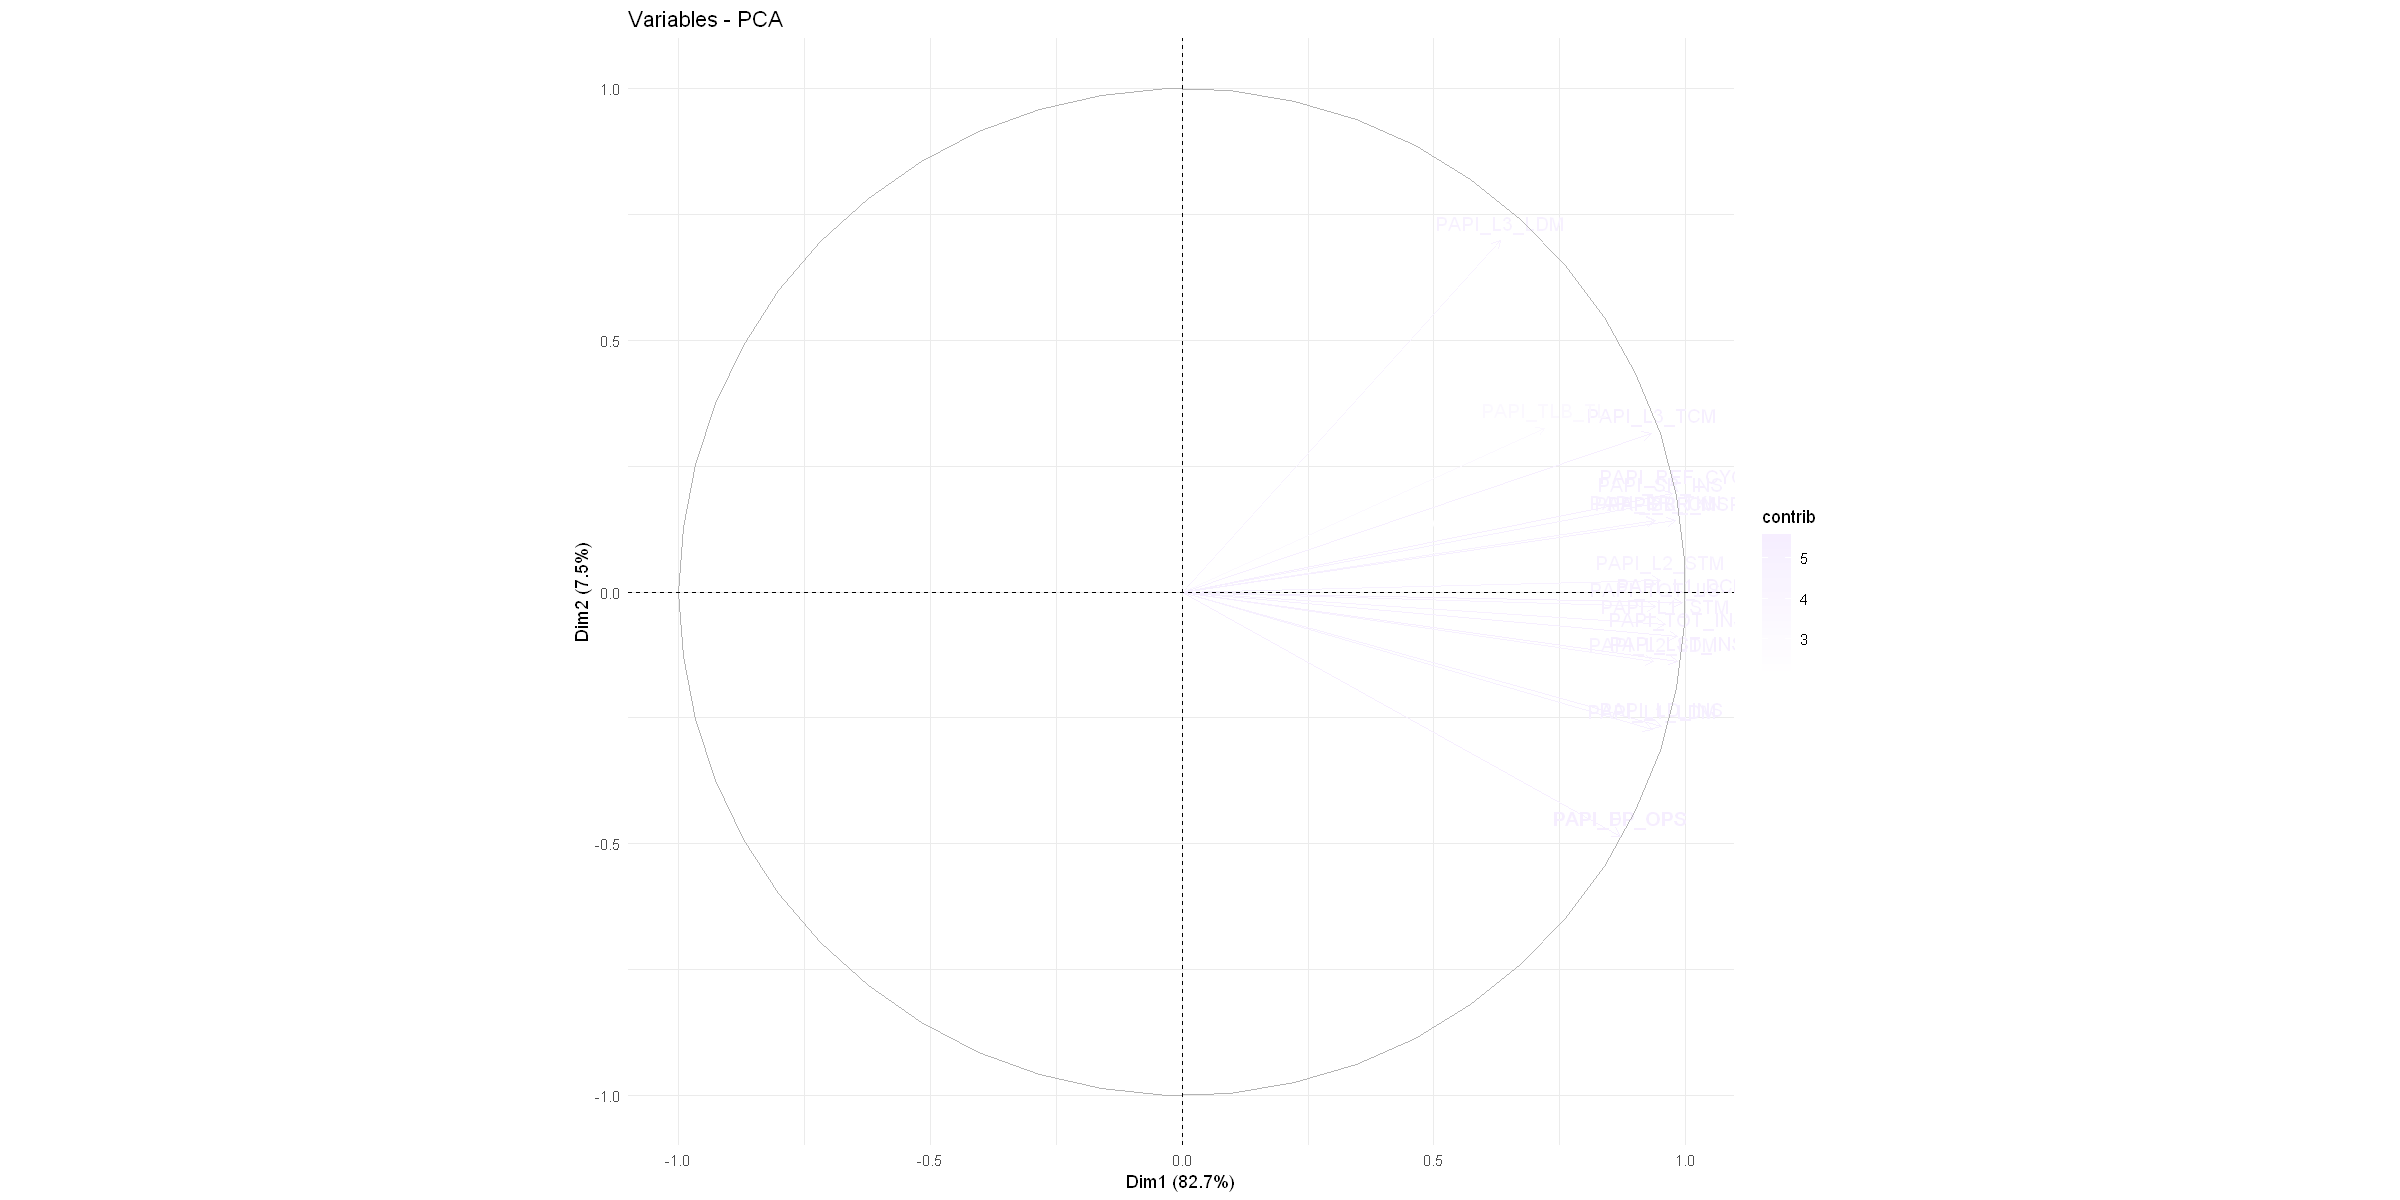

In [37]:
fviz_pca_var(res.pca, col.var="contrib") + scale_color_gradient2(low="white", mid="blue", high="red", midpoint=50) + theme_minimal()

In [38]:
new_mydata1 = mydata[,5:61]
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TOT_CYC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_DM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_FP_INS))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_INS))

new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_IM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_RES_STL))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_PRC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_MSP))




new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_DP))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_SP))

my_data_ordered1 <- new_mydata1[,order(colnames(new_mydata1))]


options(repr.matrix.max.rows = 100)
options(repr.matrix.max.cols = 100)
res1 <- cor(my_data_ordered1)
dim(res1)
round(res1, 2)

Warning message in cor(my_data_ordered1):
"the standard deviation is zero"

[1] 21 21

,PAPI_BR_CN,PAPI_BR_NTK,PAPI_BR_TKN,PAPI_BR_UCN,PAPI_DP_OPS,PAPI_FP_OPS,PAPI_L1_DCM,PAPI_L1_LDM,PAPI_L1_STM,PAPI_L2_LDM,PAPI_L2_STM,PAPI_L3_LDM,PAPI_L3_TCM,PAPI_LD_INS,PAPI_LST_INS,PAPI_REF_CYC,PAPI_SP_OPS,PAPI_SR_INS,PAPI_TLB_TL,PAPI_TOT_IIS,PAPI_TOT_INS
PAPI_BR_CN,1.00,0.75,1.00,0.63,0.75,0.75,0.92,0.82,0.86,0.83,0.86,0.64,0.91,0.85,0.89,0.94,NA,0.90,0.70,0.86,0.95
PAPI_BR_NTK,0.75,1.00,0.75,0.63,0.72,0.72,0.77,0.76,0.76,0.68,0.68,0.40,0.65,0.77,0.78,0.74,NA,0.72,0.47,0.77,0.79
PAPI_BR_TKN,1.00,0.75,1.00,0.63,0.75,0.75,0.92,0.82,0.86,0.83,0.86,0.64,0.91,0.85,0.89,0.94,NA,0.90,0.70,0.86,0.95
PAPI_BR_UCN,0.63,0.63,0.63,1.00,0.48,0.48,0.57,0.52,0.54,0.51,0.53,0.40,0.57,0.54,0.56,0.59,NA,0.56,0.37,0.57,0.60
PAPI_DP_OPS,0.75,0.72,0.75,0.48,1.00,1.00,0.87,0.95,0.86,0.88,0.81,0.21,0.66,0.96,0.92,0.75,NA,0.73,0.50,0.83,0.90
PAPI_FP_OPS,0.75,0.72,0.75,0.48,1.00,1.00,0.87,0.95,0.86,0.88,0.81,0.21,0.66,0.96,0.92,0.75,NA,0.73,0.50,0.83,0.90
PAPI_L1_DCM,0.92,0.77,0.92,0.57,0.87,0.87,1.00,0.95,0.95,0.95,0.93,0.64,0.92,0.96,0.99,0.96,NA,0.94,0.70,0.93,0.97
PAPI_L1_LDM,0.82,0.76,0.82,0.52,0.95,0.95,0.95,1.00,0.87,0.95,0.84,0.46,0.78,0.98,0.96,0.85,NA,0.80,0.59,0.89,0.92
PAPI_L1_STM,0.86,0.76,0.86,0.54,0.86,0.86,0.95,0.87,1.00,0.86,0.96,0.53,0.87,0.91,0.96,0.94,NA,0.96,0.67,0.92,0.96
PAPI_L2_LDM,0.83,0.68,0.83,0.51,0.88,0.88,0.95,0.95,0.86,1.00,0.90,0.55,0.86,0.94,0.94,0.87,NA,0.83,0.62,0.86,0.90


In [39]:
library(corrplot)


corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "AOE", number.cex = 0.5)

corrplot 0.84 loaded


ERROR: Error in eigen(corr): infinite or missing values in 'x'


In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=2)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=3)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=4)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=6)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=7)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=8)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=9)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=10)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=11)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=12)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=13)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=14)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=15)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=16)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=17)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "FPC", number.cex = 0.5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "alphabet", number.cex = 0.5)